In [2]:
import math
from my_helpers import *
import viz

In [3]:
from matplotlib.ticker import EngFormatter
engFormat = EngFormatter()

In [4]:
L = 95.49*si.m
C = 45.1*si.n
Rw = 109


In [5]:
#Exact Fr = 2315 Hz
get_resonant_frequency(L,C)

## TODO
## Impliment exact frequency

2425.229900770953

In [6]:
Fr = 2315

In [7]:
freqs = [
    700,
    900,
    1000,
    2000,
    Fr,
    3000,
    5000,
    7000
]

Xc_list = [get_capacitive_reactance(C,freq) for freq in freqs]
Xc_list

[-5041.334909467701j,
 -3921.038262919323j,
 -3528.934436627391j,
 -1764.4672183136954j,
 -1524.3777264049204j,
 -1176.3114788757969j,
 -705.7868873254781j,
 -504.13349094677005j]

In [8]:
for x in Xc_list:
    print(engFormat(x.imag))

−5.04133 k
−3.92104 k
−3.52893 k
−1.76447 k
−1.52438 k
−1.17631 k
−705.787
−504.133


In [9]:
Xl_list = [get_inductive_reactance(L,freq) for freq in freqs]
Xl_list

[419.986955487805j,
 539.9832284843208j,
 599.9813649825786j,
 1199.9627299651572j,
 1388.9568599346696j,
 1799.944094947736j,
 2999.906824912893j,
 4199.869554878051j]

In [10]:
for x in Xl_list:
    print(engFormat(x.imag))

419.987
539.983
599.981
1.19996 k
1.38896 k
1.79994 k
2.99991 k
4.19987 k


In [11]:

for i, Xl in enumerate(Xl_list):
    print(recipsumrecip([Xl,Xc_list[i]]))

(-0+458.1552658025498j)
(-0+626.2231400133194j)
(-0+722.8845421660237j)
(-0+3750.714022515375j)
(-0+15634.923593454163j)
-3395.099687950716j
-922.9224965667479j
-572.9020859702546j


In [12]:
Voltages_R = [
    34.4*si.m,
    26.3*si.m,
    23.2*si.m,
    6.31*si.m,
    3.5*si.m,
    2.9*si.m,
    14.4*si.m,
    23.8*si.m,
]


In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

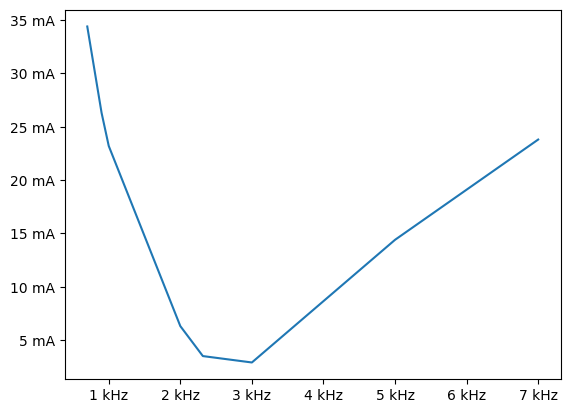

In [16]:
fig = plt.figure()
ax = plt.gca()
ax.plot(freqs,Voltages_R)
ax.xaxis.set_major_formatter(EngFormatter(unit='Hz'))
ax.yaxis.set_major_formatter(EngFormatter(unit='A'))

In [15]:
def get_exact_resonant_frequency(L,C,Rw):
    # Denominator is the same as the inexact formula
    res_freq = get_resonant_frequency(L,C)
    # A fancy numerater accounts for winding resistance
    numerator = math.sqrt(1-Rw**2*(C/L))
    exact_freq = numerator*res_freq
    return exact_freq

get_exact_resonant_frequency(L,C,10)   

2425.1726281978895